Equação de https://apps.dtic.mil/dtic/tr/fulltext/u2/1027301.pdf para obter as coordenadas (X, Y) em 3D a partir das (x, y) em 2D com eixo Z normal a direção onde a câmera está olhando:

 Equação 1:
$$ \begin{bmatrix}
X \\
Y
\end{bmatrix}=\frac{d}{f}  \begin{bmatrix}
x \\
y
\end{bmatrix}$$ (1)

Onde $f$ é a distância focal e d é a distância no eixo Z(normal ao plano da imagem)

A distâcia no mundo real entre dois pontos  A e B é dada pela sua diferença de distância em cada coordenada X, Y e Z. A diferença em Z é $d_A -d_B$. Em X e Y usamos a equação 1
$ \begin{bmatrix}
X \\
Y
\end{bmatrix}_A - \begin{bmatrix}
X \\
Y
\end{bmatrix}_B =\frac{1}{f}\begin{bmatrix}
d_A x_A -d_B x_B \\
d_A y_A -d_B y_B
\end{bmatrix}$

Somando os quadrados de todas como já sabemos da distância real. Onde w, l, x e y são conhecidos e f e os 'd's são icognitas obtemos:
$w^2 = (d_A -d_B)^2+ \frac{1}{f^2}(d_A x_A -d_B x_B)^2 +\frac{1}{f^2}(d_A y_A -d_B y_B)^2 $ (2)
$l^2 = (d_C -d_B)^2 +\frac{1}{f^2}(d_C x_C -d_B x_B)^2 +\frac{1}{f^2}(d_C y_C -d_B y_B)^2 $ (3)

Como a pista é um retângulo:

$l^2 +w^2  = (d_C -d_A)^2+ \frac{1}{f^2}(d_C x_C -d_A x_A)^2 +\frac{1}{f^2}(d_C y_C -d_A y_A)^2 $ (4)


simplificando (2):

$w^2 = d_A^2-2d_A d_B +d_B^2+ \frac{1}{f^2}(d_A^2 x_A^2 -2 d_A x_A d_B x_B+d_B^2 x_B^2)+ \frac{1}{f^2}(d_A^2 y_A^2 -2 d_A y_A d_B y_B+d_B^2 y_B^2) =$

$w^2= \frac{(f^2+x_A^2+y_A^2)}{f^2}d_A^2+\frac{(f^2+x_B^2+y_B^2)}{f^2}d_B^2 -2\frac{(f^2 +x_A x_B+y_A y_B )}{f^2}d_A d_B$ (5)

simplificando (3):

$l^2 = \frac{(f^2+x_C^2+y_C^2)}{f^2}d_C^2+\frac{(f^2+x_B^2+y_B^2)}{f^2}d_B^2 -2\frac{(f^2 +x_C x_B+y_C y_B )}{f^2}d_C d_B$ (6)


simplificando (4):

$l^2+w^2 = \frac{(f^2+x_C^2+y_C^2)}{f^2}d_C^2+\frac{(f^2+x_A^2+y_A^2)}{f^2}d_A^2 -2\frac{(f^2 +x_C x_A+y_C y_A )}{f^2}d_A d_C$ (7)



Nos sabemos também a altura $h$ do avião:

A distâcia entre A e avião no plano da pista por exemplo pode ser expressa como $d_A^2-h^2$ que é o triângulo retângulo da distância até o ponto com a altura.

F = (P x  D) / W

In [ ]:
import PIL.Image
img = PIL.Image.open('./exifex.jpg')
exif_data = img._getexif()
print (exif_data[37386])

In [58]:
#comprimento do foco
fl=20

x_a=155
x_b=156
x_c=106

y_a=200
y_b=100
y_c=100

W=100
L=100

#calcula coeficientes numericos da equacao
A=(fl**2+x_a**2+y_a**2)/fl**2
B=(fl**2+x_b**2+y_b**2)/fl**2
C=(fl**2+x_c**2+y_c**2)/fl**2
D=(fl**2+x_a*x_b+y_a*y_b)/fl**2
E=(fl**2++x_c*x_b+y_c*y_b)/fl**2
R=(fl**2++x_a*x_c+y_a*y_c)/fl**2

In [155]:
#primeira tentativa com metodo numerico
from scipy.optimize import broyden1
from scipy.optimize import fsolve
def funcao(distancias):
    F=[0,0,0]
    da=distancias[0]
    db=distancias[1]
    dc=distancias[2]
    F[0]=A*da**2+B*db**2-2*D*da*db-W**2
    F[1]=C*dc**2+B*db**2-2*E*dc*db-W**2
    F[2]=A*da**2+C*dc**2-2*R*da*dc-W**2-L**2
    return F
sol=fsolve(funcao,[100,100,100])
print (sol)

[22.6594834  26.15520826 20.44278587]


In [60]:
import sympy as sym
sym.init_printing()
#cria simbolos para as variaveis
da,db,dc, dd = sym.symbols('da,db,dc,dd')
#creates symbols for the constants
a,b,c, d,e,r = sym.symbols('a,b,c,d,e,r')

xa = sym.Symbol('xa')
xb = sym.Symbol('xb')
xc = sym.Symbol('xc')
xd = sym.Symbol('xd')

ya = sym.Symbol('ya')
yb = sym.Symbol('yb')
yc = sym.Symbol('yc')
yd = sym.Symbol('yd')

w = sym.Symbol('w')
l = sym.Symbol('l')
foc = sym.Symbol('foc')


#f = sym.Eq((da-db)**2+(1/foc**2)*(da*xa-db*xb)**2+(1/foc**2)*(da*ya-db*yb)**2,w**2)
#g = sym.Eq((dc-db)**2+(1/foc**2)*(dc*xc-db*xb)**2+(1/foc**2)*(dc*yc-db*yb)**2,l**2)
#h = sym.Eq((da-dc)**2+(1/foc**2)*(da*xa-dc*xc)**2+(1/foc**2)*(da*ya-dc*yc)**2,l**2+w**2)

f = sym.Eq(a*da**2+b*db**2-2*d*da*db-w**2,0)
g = sym.Eq(c*dc**2+b*db**2-2*e*dc*db-l**2,0)
h = a*da**2+c*dc**2-2*r*da*dc-w**2-l**2



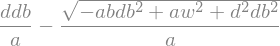

In [61]:
#resolve o bascara ára as duas primeiras equacoes
dalfa=sym.solve([f],(da))
dcelta=sym.solve([g],(dc))
dalfa[0][0]

In [31]:
equ=[]
expr=h.subs(da, dalfa[0][0])
expr=expr.subs(dc, dcelta[0][0])
#expr = sym.Eq(expr,0)
equ.append(expr)

expr=h.subs(da, dalfa[1][0])
expr=expr.subs(dc, dcelta[0][0])
#expr = sym.Eq(expr,0)
equ.append(expr)

expr=h.subs(da, dalfa[0][0])
expr=expr.subs(dc, dcelta[1][0])
#expr = sym.Eq(expr,0)
equ.append(expr)

expr=h.subs(da, dalfa[1][0])
expr=expr.subs(dc, dcelta[1][0])
#expr = sym.Eq(expr,0)
equ.append(expr)

In [43]:
#tentativa com metodo simbolico
#sym.solve([sym.Eq(num,0)],(db))
#dbeta=[]
#dbeta.append(sym.solve([equ[0]],(db)))
#dbeta.append(sym.solve([equ[1]],(db)))
#dbeta.append(sym.solve([equ[2]],(db)))
#dbeta.append(sym.solve([equ[3]],(db)))
#dbeta[0]

In [84]:
#tentativa mista
x=sym.Symbol('x')
num=equ[2].subs([(a,A),(b,B),(c,C),(d,D),(e,E),(r,R),(w,W),(l,L),(db,x)])
print(num)

10000.0*(0.0878178610369948*x - sqrt(1 - 0.000972023282887077*x**2))**2 + 10000.0*(0.0915618631460143*x + sqrt(1 - 0.000300425217230542*x**2))**2 - 184.15*(0.691967403958091*x - 7.87957479021936*sqrt(1 - 0.000972023282887077*x**2))*(1.24496210020336*x + 13.5969502741334*sqrt(1 - 0.000300425217230542*x**2)) - 20000


In [154]:
from scipy.optimize import broyden2
from scipy.optimize import fsolve
def equation(ent):
    subs=ent[0]
    return num.evalf(subs={x:subs})
    
#equation([29.83586])
sol=fsolve(equation,29)
print (sol)

[29.83571029]
